In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


from glob import glob #glob helps us list all the files in directory
import librosa #for working with audio files
import librosa.display #for visualizing waveform in time domain (need to study)
import IPython.display as ipd #so that we are able to play audio files in the notebook
from itertools import cycle #copy pasted code for colors no impact on implementation whatsoever

In [2]:
sns.set_theme(style='white',palette=None)
color_pal=plt.rcParams['axes.prop_cycle'].by_key()['color']
color_cycle=cycle(plt.rcParams['axes.prop_cycle'].by_key()['color'])

# READING AUDIO FILES

In [3]:
#Reading Audio Files
audio_file=glob("audio_speech_actors\*\*.wav")
#glob will list all the files starting with given path

In [4]:
#Play Audio files
ipd.Audio(audio_file[0])

In [5]:
#Let's load this file
y,sr=librosa.load(audio_file[0])

In [6]:
y

array([ 1.6517616e-08, -6.5464434e-08,  1.2522355e-07, ...,
        0.0000000e+00,  0.0000000e+00,  0.0000000e+00], dtype=float32)

In [7]:
#Sampling Rate
sr

22050

In [8]:
y,sr=librosa.load(audio_file[0])
print(f'y: {y[ :10]}')
print(f'shape of y :{y.shape}')
print(f'sampling rate : {sr}')


y: [ 1.6517616e-08 -6.5464434e-08  1.2522355e-07 -1.9278477e-07
  2.6331836e-07 -3.3016912e-07  3.8501304e-07 -4.1818913e-07
  4.1913367e-07 -3.7683319e-07]
shape of y :(72838,)
sampling rate : 22050


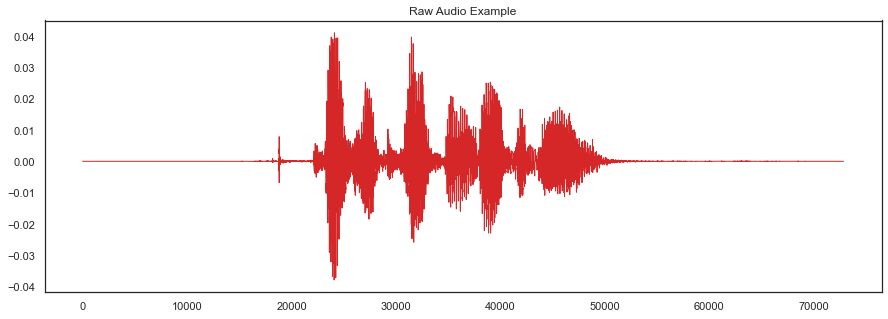

In [30]:
 #converted numpy array to pandas series as series are easier to plot than numpy arrays
pd.Series(y).plot(figsize=(15,5),lw =1,title='Raw Audio Example',color=color_pal[3])
plt.show()

On observing above graph, we can see that there is silence at the beginning and end of our file. We can use librosa's in built trim function to get rid of these silence

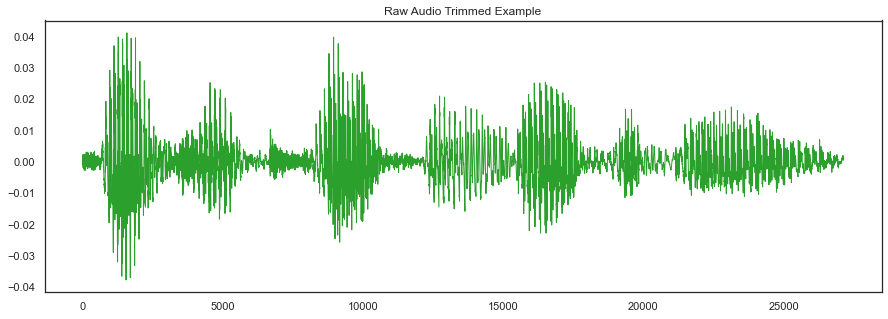

In [32]:
#as we can see at above fig,having low noise at starting and end so we can trime this
y_trimmed, _ = librosa.effects.trim(y,top_db=20) #Threshold is 20

pd.Series(y_trimmed).plot(figsize=(15,5),lw =1,title='Raw Audio Trimmed Example',color=color_pal[2])
plt.show()

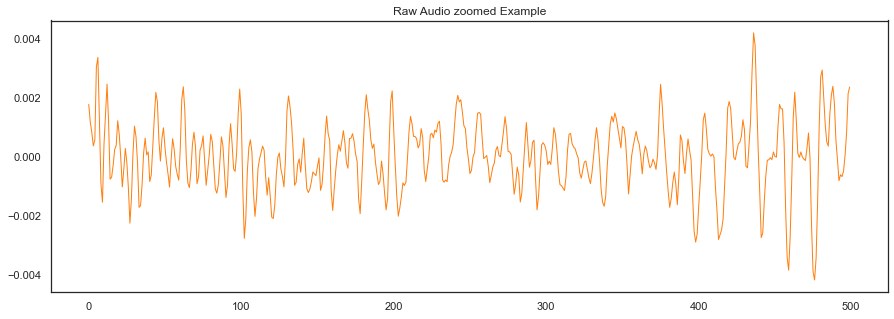

In [39]:

#To check Zoomed data
pd.Series(y[30000:30500]).plot(figsize=(15,5),lw =1,title='Raw Audio zoomed Example',color=color_pal[1])
plt.show()


# SPECTOGRAM


A spectrogram is a visual way of representing the signal strength, or “loudness”, of a signal over time at various frequencies present in a particular waveform. Not only can one see whether there is more or less energy at, for example, 2 Hz vs 10 Hz, but one can also see how energy levels vary over time.

In [42]:
#Spectogram(apply fourier transformation)
D =librosa.stft(y)
sound_in_decimal_form =librosa.amplitude_to_db(np.abs(D),ref=np.max)
sound_in_decimal_form.shape

(1025, 143)

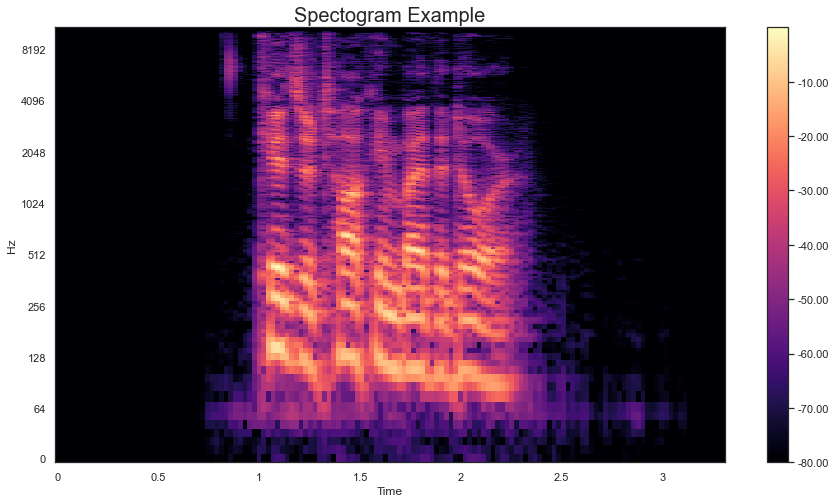

In [47]:
#Plot the transformed audio data
fig,ax =plt.subplots(figsize=(15,8))
img =librosa.display.specshow(sound_in_decimal_form,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)

ax.set_title('Spectogram Example',fontsize=20)
fig.colorbar(img,ax=ax,format =f'%0.2f')
                             
plt.show()


We can see on left how different frequency change in terms of intensity over time!

# MEL SPECTOGRAM

The Mel spectrogram is used to provide our models with sound information similar to what a human would perceive. The raw audio waveforms are passed through filter banks to obtain the Mel spectrogram.

In [54]:
#MEL Spectogram
s = librosa.feature.melspectrogram(y=y,
                                  sr=sr,
                                  n_mels=128*2,)

sound_in_decimal_form_mel =librosa.amplitude_to_db(s,ref=np.max)
sound_in_decimal_form_mel.shape

(256, 143)

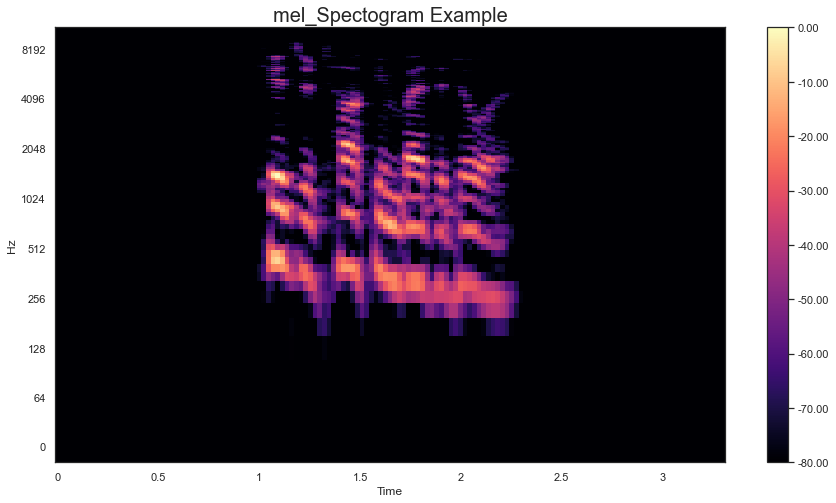

In [55]:
#Plot the transformed audio data
fig,ax =plt.subplots(figsize=(15,8))
img =librosa.display.specshow(sound_in_decimal_form_mel,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)

ax.set_title('mel_Spectogram Example',fontsize=20)
fig.colorbar(img,ax=ax,format =f'%0.2f')
                             
plt.show()

Now, the data S_db_mel is something we can feed to our machine learning model and train! We need to apply the same transformations to whole dataset!